# Machine learning

## Little inspection

In [1]:
# importing librairies ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

# %matplotlib notebook

In [2]:
# Allow to print multiple output 
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [3]:
np.__version__

'1.19.4'

In [4]:
# Importing CLEANED Dataset
df = pd.read_csv('./dataset/immo_collect_clean.csv', index_col = 0)
df.shape
df.head()

(23365, 15)

,postal_code,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,is_new,locality,district,province,province_int,region,region_int,district_int,ratio_free_build
5573,4000,85000,1,60,1,0,0,Liège,Liège,liege,4.0,wallonie,1.0,3.0,-2.830605
5574,6032,90000,1,60,1,0,1,Charleroi,Charleroi,hainaut,6.0,wallonie,1.0,21.0,-2.885534
5577,5300,99000,1,45,1,1,1,Andenne,Namur,namur,9.0,wallonie,1.0,1.0,-1.977659
5580,1080,87500,1,42,1,0,1,Molenbeek-Saint-Jean,Bruxelles-Capitale,bruxelles-capitale,3.0,bruxelles-capitale,2.0,30.0,-3.036241
5581,1080,87500,1,42,1,0,1,Sint-Jans-Molenbeek,Bruxelles-Capitale,bruxelles-capitale,3.0,bruxelles-capitale,2.0,30.0,-3.036241


In [5]:
# I retrieve only utils columns for my model

df = df.iloc[:,0:7]
df.head()

,postal_code,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,is_new
5573,4000,85000,1,60,1,0,0
5574,6032,90000,1,60,1,0,1
5577,5300,99000,1,45,1,1,1
5580,1080,87500,1,42,1,0,1
5581,1080,87500,1,42,1,0,1


In [6]:
df.isna().sum()

postal_code               0
price                     0
number_of_bedroom         0
house_area                0
fully_equipped_kitchen    0
terrace                   0
is_new                    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23365 entries, 5573 to 48763
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   postal_code             23365 non-null  int64
 1   price                   23365 non-null  int64
 2   number_of_bedroom       23365 non-null  int64
 3   house_area              23365 non-null  int64
 4   fully_equipped_kitchen  23365 non-null  int64
 5   terrace                 23365 non-null  int64
 6   is_new                  23365 non-null  int64
dtypes: int64(7)
memory usage: 1.4 MB


(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

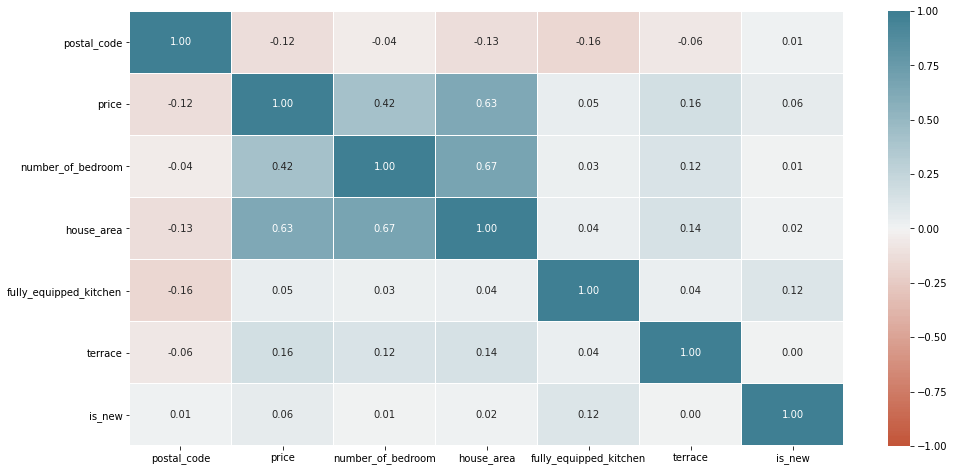

In [8]:

# Print the heatmap
plt.subplots(figsize=(16, 8))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

## Preparing the data

### Defines variables

In [9]:
X = df.drop(columns=['price'])
X.head()

,postal_code,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,is_new
5573,4000,1,60,1,0,0
5574,6032,1,60,1,0,1
5577,5300,1,45,1,1,1
5580,1080,1,42,1,0,1
5581,1080,1,42,1,0,1


In [10]:
y = df[['price']]
y.head()

,price
5573,85000
5574,90000
5577,99000
5580,87500
5581,87500


### Split our dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
# X_train
# y_test

### Scale our data

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Init a standard scaler
ss = MinMaxScaler()

# Scale the features
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train[0]

array([0.81192303, 0.33333333, 0.18879056, 1.        , 0.        ,
       1.        ])

## Let's training with different algo for demo

### Linear Regression

In [14]:
regressor = linear_model.LinearRegression()

In [15]:
regressor.fit(X_train, y_train) # Entrainement du model

LinearRegression()

In [16]:
score = regressor.score(X_train,y_train)
score

0.40055938052007456